# Text classification 

In this notebook we show how to classify texts based on the presence of words into 34 different classes

## Imports

In [1]:
import glob
import pickle

import pandas as pd
from os.path import basename, join
from tqdm.auto import tqdm

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sn
import matplotlib.pyplot as plt

## Load avalible file paths

In [2]:
basedir = join("out_file")

paths = glob.glob(f"{basedir}/*.pkl")

f"{len(paths)} files in the directory"

'6885 files in the directory'

## Count quantity of each noun, verb and adjective in every text

In [3]:
nouns = {}
verbs = {}
adjectives = {}

for path in paths:
    with open(path,'rb') as f:
        datafile = pickle.load(f)
        
        for key, value in datafile["noun"].items():
            try:
                nouns[key] += value
            except KeyError as e:
                nouns[key] = value
                
        for key, value in datafile["verb"].items():
            try:
                verbs[key] += value
            except KeyError as e:
                verbs[key] = value
                
        for key, value in datafile["adjective"].items():
            try:
                adjectives[key] += value
            except KeyError as e:
                adjectives[key] = value                

f"nouns: {len(nouns)}, verbs {len(verbs)}, adjectives {len(adjectives)}"

'nouns: 127089, verbs 7308, adjectives 18410'

## Narrow nouns verbs and adjectives to those with presence more frequent then threshold

In [4]:
quantity_threshold = 50

filtered_nouns = {key: value for key, value in nouns.items() if value>quantity_threshold}
filtered_verbs = {key: value for key, value in verbs.items() if value>quantity_threshold}
filtered_adjectives = {key: value for key, value in adjectives.items() if value>quantity_threshold}

f"nouns: {len(filtered_nouns)}, verbs {len(filtered_verbs)}, adjectives {len(filtered_adjectives)}"

'nouns: 2549, verbs 805, adjectives 920'

## Generate classnames

In [5]:
classes = set(sorted([basename("".join(filter(lambda x: not x.isdigit(), path))).replace("_.pkl", "") for path in paths]))
f"{len(classes)} classes in the dataset"

'34 classes in the dataset'

## Check a presence of the most frequent words in every file

In [6]:
labels_for_all_examples = []
nouns_presence_in_all_examples = []
verbs_presence_in_all_examples = []
adjectives_presence_in_all_examples = []

for path in tqdm(paths):
    
    label = list(filter(lambda label: label in path, classes))[0]
    labels_for_all_examples.append(label)
    
    with open(path,'rb') as f:
        datafile = pickle.load(f)
        
        nouns_in_file = list(datafile["noun"].keys())
        verbs_in_file = list(datafile["verb"].keys())
        adjectives_in_file = list(datafile["adjective"].keys())
        
        nouns_presence_one_hot_list = list(map(lambda word: word in nouns_in_file, filtered_nouns))
        nouns_presence_in_all_examples.append(nouns_presence_one_hot_list) 
        
        verbs_presence_one_hot_list = list(map(lambda word: word in verbs_in_file, filtered_verbs))
        verbs_presence_in_all_examples.append(verbs_presence_one_hot_list) 
        
        adjectives_presence_one_hot_list = list(map(lambda word: word in adjectives_in_file, filtered_adjectives))
        adjectives_presence_in_all_examples.append(adjectives_presence_one_hot_list) 

## Generate dataframes

In [7]:
y_df = pd.DataFrame(data={"label": labels_for_all_examples})
y_df.head()

label
0        Komiksy
1    Narciarstwo
2   Rachunkowosc
3   Rachunkowosc
4  Sporty-silowe

In [8]:
nouns_df = pd.DataFrame(nouns_presence_in_all_examples, columns=filtered_nouns.keys())
nouns_df.head()

X    Men  seria  superbohater  grupa  scenariusz   John  rysunek  \
0   True   True   True          True   True        True   True     True   
1  False  False  False         False  False       False  False    False   
2  False  False  False         False  False       False  False    False   
3  False  False  False         False   True       False  False    False   
4  False  False  False         False  False       False  False    False   

     rok  nakład  ...  Emilka  Żabon  kapturnik  absynt  spojówka  Rigby  \
0   True    True  ...   False  False      False   False     False  False   
1   True   False  ...   False  False      False   False     False  False   
2   True   False  ...   False  False      False   False     False  False   
3  False   False  ...   False  False      False   False     False  False   
4  False   False  ...   False  False      False   False     False  False   

   Ahonen  madżong    HBV   Chii  
0   False    False  False  False  
1   False    False  False  False  
2   False    False  False  False  
3   False    False  False  False  
4   False    False  False  False  

[5 rows x 2549 columns]

In [9]:
verbs_df = pd.DataFrame(verbs_presence_in_all_examples, columns=filtered_verbs.keys())
verbs_df.head()

stworzyć  ukazywać  publikować    być  zdobyć  startować  wystąpić  \
0      True      True        True   True    True      False     False   
1     False     False       False   True    True       True      True   
2     False     False       False   True   False      False     False   
3     False     False       False  False   False      False     False   
4     False     False       False   True   False       True     False   

   zdobywać  wywalczyć  zajmować  ...  opadać  zaokrąglić  promować  \
0     False      False     False  ...   False       False     False   
1      True       True      True  ...   False       False     False   
2     False      False     False  ...   False       False     False   
3     False      False     False  ...   False       False     False   
4     False      False     False  ...   False       False     False   

   praktykować  zrzucać  proponować  złomować  zakazić  uplasować  uzupełnić  
0        False    False       False     False    False      False      False  
1        False    False       False     False    False      False      False  
2        False    False       False     False    False      False      False  
3        False    False       False     False    False      False      False  
4        False    False       False     False    False      False      False  

[5 rows x 805 columns]

In [10]:
adjectives_df = pd.DataFrame(adjectives_presence_in_all_examples, columns=filtered_adjectives.keys())
adjectives_df.head()

amerykański  komiksowy   2004  polski  główny   2006  dobry  niebezpieczny  \
0         True       True   True    True    True   True   True           True   
1        False      False   True   False   False   True  False          False   
2        False      False  False   False   False  False  False          False   
3        False      False  False   False   False  False  False          False   
4        False      False  False   False   False  False  False          False   

    2008  suchy  ...  ligowy  wyścigowy  wirusowy  lubelski  powyższy  \
0   True  False  ...   False      False     False     False     False   
1  False   True  ...   False      False     False     False     False   
2  False  False  ...   False      False     False     False     False   
3  False  False  ...   False      False     False     False     False   
4  False  False  ...   False      False     False     False     False   

   leczniczy  towarowy  cylindrowy  trałowy  wodorowy  
0      False     False       False    False     False  
1      False     False       False    False     False  
2      False     False       False    False     False  
3      False     False       False    False     False  
4      False     False       False    False     False  

[5 rows x 920 columns]

## Classifiers

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB

### Nouns

In [12]:
X = nouns_df
y = y_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [13]:
model = BernoulliNB()

clf = model.fit(X_train, y_train)

f"Train accuracy: {accuracy_score(y_train, clf.predict(X_train))}, Test accracy: {accuracy_score(y_test, clf.predict(X_test))}"

/home/piotr/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'Train accuracy: 0.7810457516339869, Test accracy: 0.7320261437908496'

In [14]:
print(classification_report(y_test, clf.predict(X_test), target_names=y.label.unique()))

                                   precision    recall  f1-score   support

                          Komiksy       0.46      0.88      0.61        42
                      Narciarstwo       0.92      0.87      0.89        39
                     Rachunkowosc       0.57      0.17      0.27        23
                    Sporty-silowe       0.90      0.66      0.76        41
                  Gry-komputerowe       0.94      0.73      0.82        44
            Pierwiastki-chemiczne       0.81      0.58      0.68        38
System-opieki-zdrowotnej-w-Polsce       0.68      0.90      0.78        42
                    Galezie-prawa       0.94      0.69      0.79        42
                           Monety       0.78      0.50      0.61        42
                            Zydzi       0.87      0.65      0.74        40
                   Muzyka-powazna       1.00      0.95      0.98        44
                           Optyka       0.65      0.72      0.68        43
                        

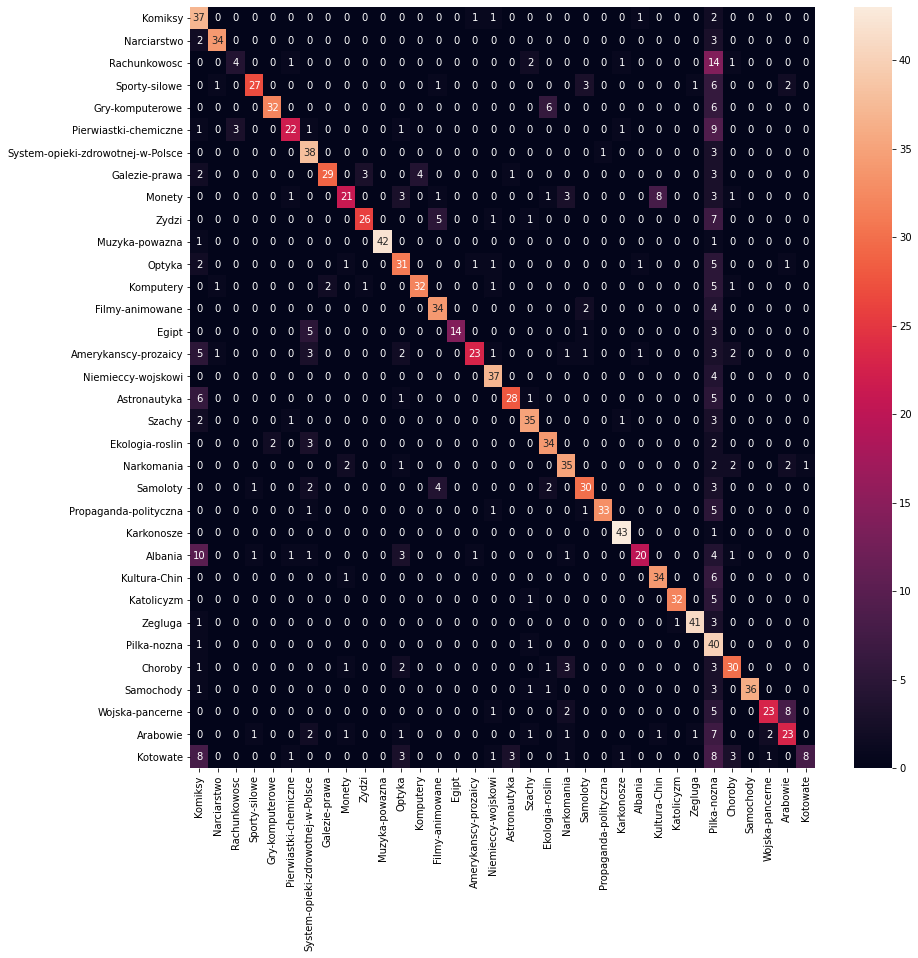

In [15]:
matrix = confusion_matrix(y_test, clf.predict(X_test))

df_cm = pd.DataFrame(matrix, index = y.label.unique(),
                  columns = y.label.unique())
plt.figure(figsize = (14,14))
sn.heatmap(df_cm, annot=True)

### Verbs

In [16]:
X = verbs_df
y = y_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [17]:
model = BernoulliNB()

clf = model.fit(X_train, y_train)

f"Train accuracy: {accuracy_score(y_train, clf.predict(X_train))}, Test accracy: {accuracy_score(y_test, clf.predict(X_test))}"

/home/piotr/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'Train accuracy: 0.5435729847494554, Test accracy: 0.4458968772694263'

In [18]:
print(classification_report(y_test, clf.predict(X_test), target_names=y.label.unique()))

                                   precision    recall  f1-score   support

                          Komiksy       0.36      0.48      0.41        42
                      Narciarstwo       0.49      0.54      0.51        39
                     Rachunkowosc       0.00      0.00      0.00        23
                    Sporty-silowe       0.64      0.44      0.52        41
                  Gry-komputerowe       0.79      0.59      0.68        44
            Pierwiastki-chemiczne       0.43      0.16      0.23        38
System-opieki-zdrowotnej-w-Polsce       0.49      0.60      0.54        42
                    Galezie-prawa       0.57      0.40      0.47        42
                           Monety       0.42      0.24      0.30        42
                            Zydzi       0.50      0.20      0.29        40
                   Muzyka-powazna       0.37      0.89      0.52        44
                           Optyka       0.36      0.23      0.28        43
                        

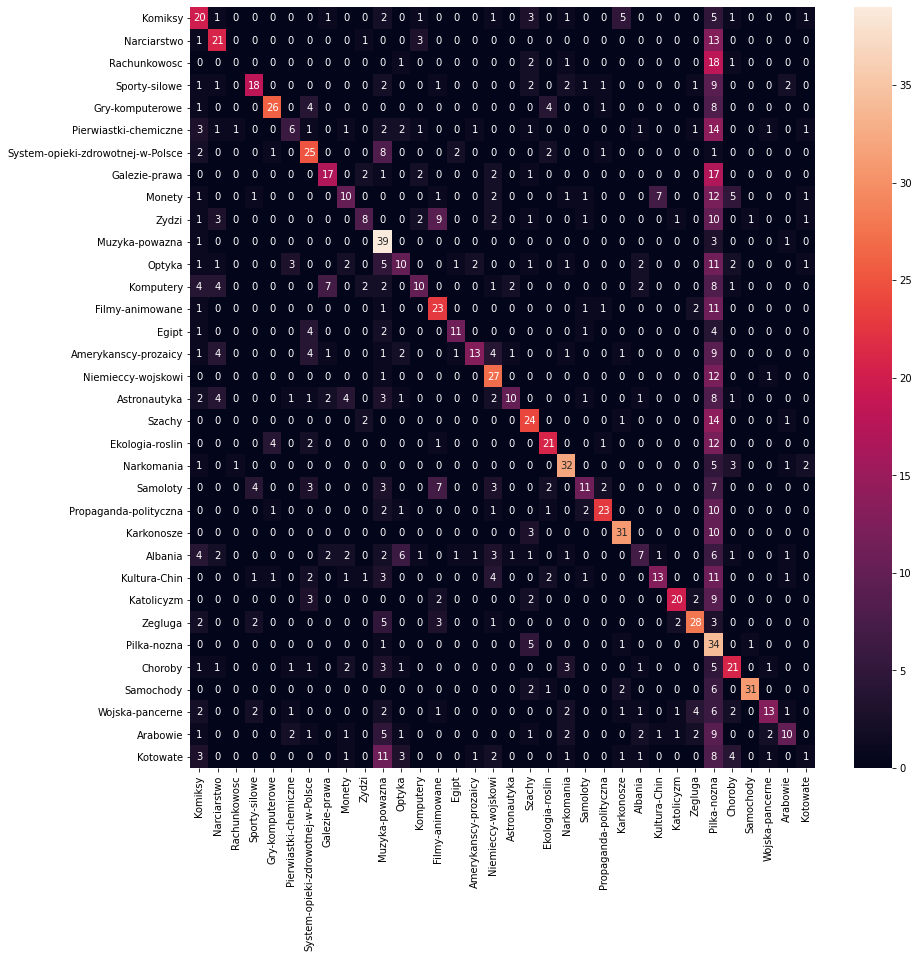

In [19]:
matrix = confusion_matrix(y_test, clf.predict(X_test))

df_cm = pd.DataFrame(matrix, index = y.label.unique(),
                  columns = y.label.unique())
plt.figure(figsize = (14,14))
sn.heatmap(df_cm, annot=True)

### Adjectives

In [20]:
X = adjectives_df
y = y_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [21]:
model = BernoulliNB()

clf = model.fit(X_train, y_train)

f"Train accuracy: {accuracy_score(y_train, clf.predict(X_train))}, Test accracy: {accuracy_score(y_test, clf.predict(X_test))}"

/home/piotr/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'Train accuracy: 0.6604938271604939, Test accracy: 0.6005809731299927'

In [22]:
print(classification_report(y_test, clf.predict(X_test), target_names=y.label.unique()))

                                   precision    recall  f1-score   support

                          Komiksy       0.49      0.67      0.57        42
                      Narciarstwo       0.71      0.64      0.68        39
                     Rachunkowosc       0.67      0.17      0.28        23
                    Sporty-silowe       0.83      0.49      0.62        41
                  Gry-komputerowe       0.92      0.52      0.67        44
            Pierwiastki-chemiczne       0.61      0.37      0.46        38
System-opieki-zdrowotnej-w-Polsce       0.54      0.79      0.64        42
                    Galezie-prawa       0.93      0.62      0.74        42
                           Monety       0.50      0.24      0.32        42
                            Zydzi       0.50      0.38      0.43        40
                   Muzyka-powazna       0.98      0.98      0.98        44
                           Optyka       0.69      0.58      0.63        43
                        

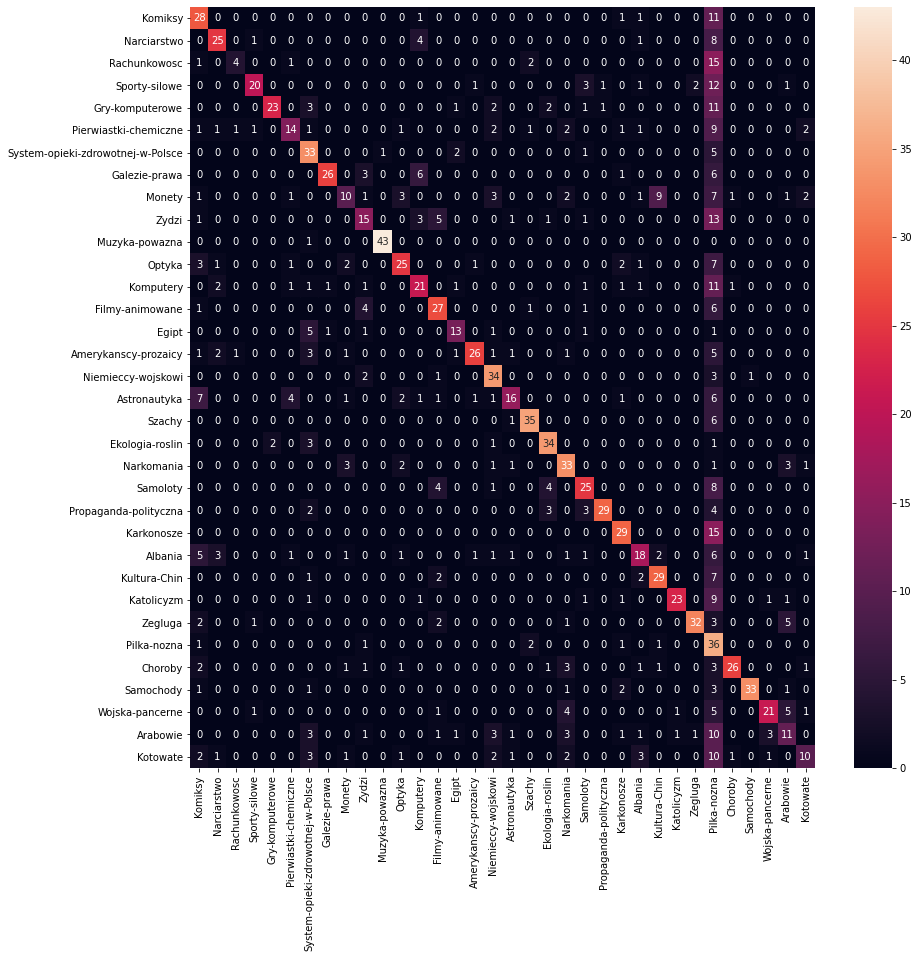

In [23]:
matrix = confusion_matrix(y_test, clf.predict(X_test))

df_cm = pd.DataFrame(matrix, index = y.label.unique(),
                  columns = y.label.unique())
plt.figure(figsize = (14,14))
sn.heatmap(df_cm, annot=True)